In [17]:
import numpy as np
from sympy import symbols, Matrix, simplify, pprint
import matplotlib.pyplot as plt
from pyscf import gto, scf
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')

import plottingsystem as pts

Hex15diene = """  
  C    0.0000000    0.1445338   -3.0858378
  C    0.0000000   -0.4150271   -1.8737054
  C    0.0000000    0.4335716   -0.6314643
  C    0.0000000   -0.4335716    0.6314643
  C    0.0000000    0.4150271    1.8737054
  C    0.0000000   -0.1445338    3.0858378
  H    0.0000000   -0.4804487   -3.9729815
  H    0.0000000    1.2242504   -3.2023136
  H    0.0000000   -1.4992548   -1.7967351
  H   -0.9055102    1.0796952   -0.6351111
  H    0.9055102    1.0796952   -0.6351111
  H    0.9055102   -1.0796952    0.6351111
  H   -0.9055102   -1.0796952    0.6351111
  H    0.0000000    1.4992548    1.7967351
  H    0.0000000   -1.2242504    3.2023136
  H    0.0000000    0.4804487    3.9729815
  """
# Converteer de coördinaten naar een NumPy-array
carbon_coordinates = pts.taking_carbon_coordinates(Hex15diene)
coordinates = pts.taking_x_and_y_coordinate(carbon_coordinates)
print(coordinates)


[[-3.0858378  0.1445338]
 [-1.8737054 -0.4150271]
 [-0.6314643  0.4335716]
 [ 0.6314643 -0.4335716]
 [ 1.8737054  0.4150271]
 [ 3.0858378 -0.1445338]]


In [18]:
hex15diene_molecule = gto.M(atom=Hex15diene, basis='sto-3g')#'sto-6g''ccpvdz'

px_indices = pts.taking_indices(hex15diene_molecule, ['C 2px'])
print(px_indices)
hf = scf.RHF(hex15diene_molecule)
hf_energy = hf.kernel()

[2, 7, 12, 17, 22, 27]
converged SCF energy = -230.160671581829


In [19]:
mo_coeff = hf.mo_coeff.round(6)
mo_coeff = pts.normaliseer(mo_coeff)

In [20]:
mo_eigenvalues = hf.mo_energy[[13,17, 21,22,23,24,27,35]]
print(mo_eigenvalues)
px_orbitals = mo_coeff[px_indices][:, [13,17, 21,22,23,24,27,35]]
print(px_orbitals)

[-0.59127598 -0.47974177 -0.30262603 -0.30216079  0.31416345  0.32448379
  0.6454703   0.78977611]
[[ 0.06940671  0.11786382  0.49873743 -0.47789302  0.48568638 -0.476924
   0.06103936  0.05383986]
 [ 0.14181564  0.18427608  0.46639118 -0.44878732 -0.48017985  0.48734985
  -0.11068975 -0.11944332]
 [ 0.50556785  0.44726653 -0.1031066   0.1299162  -0.06986665  0.04795547
   0.45443738  0.50800305]
 [ 0.50556785 -0.44726653 -0.1031066  -0.1299162   0.06986665  0.04795547
   0.45443738 -0.50800305]
 [ 0.14181564 -0.18427608  0.46639118  0.44878732  0.48017985  0.48734985
  -0.11068975  0.11944332]
 [ 0.06940671 -0.11786382  0.49873743  0.47789302 -0.48568638 -0.476924
   0.06103936 -0.05383986]]


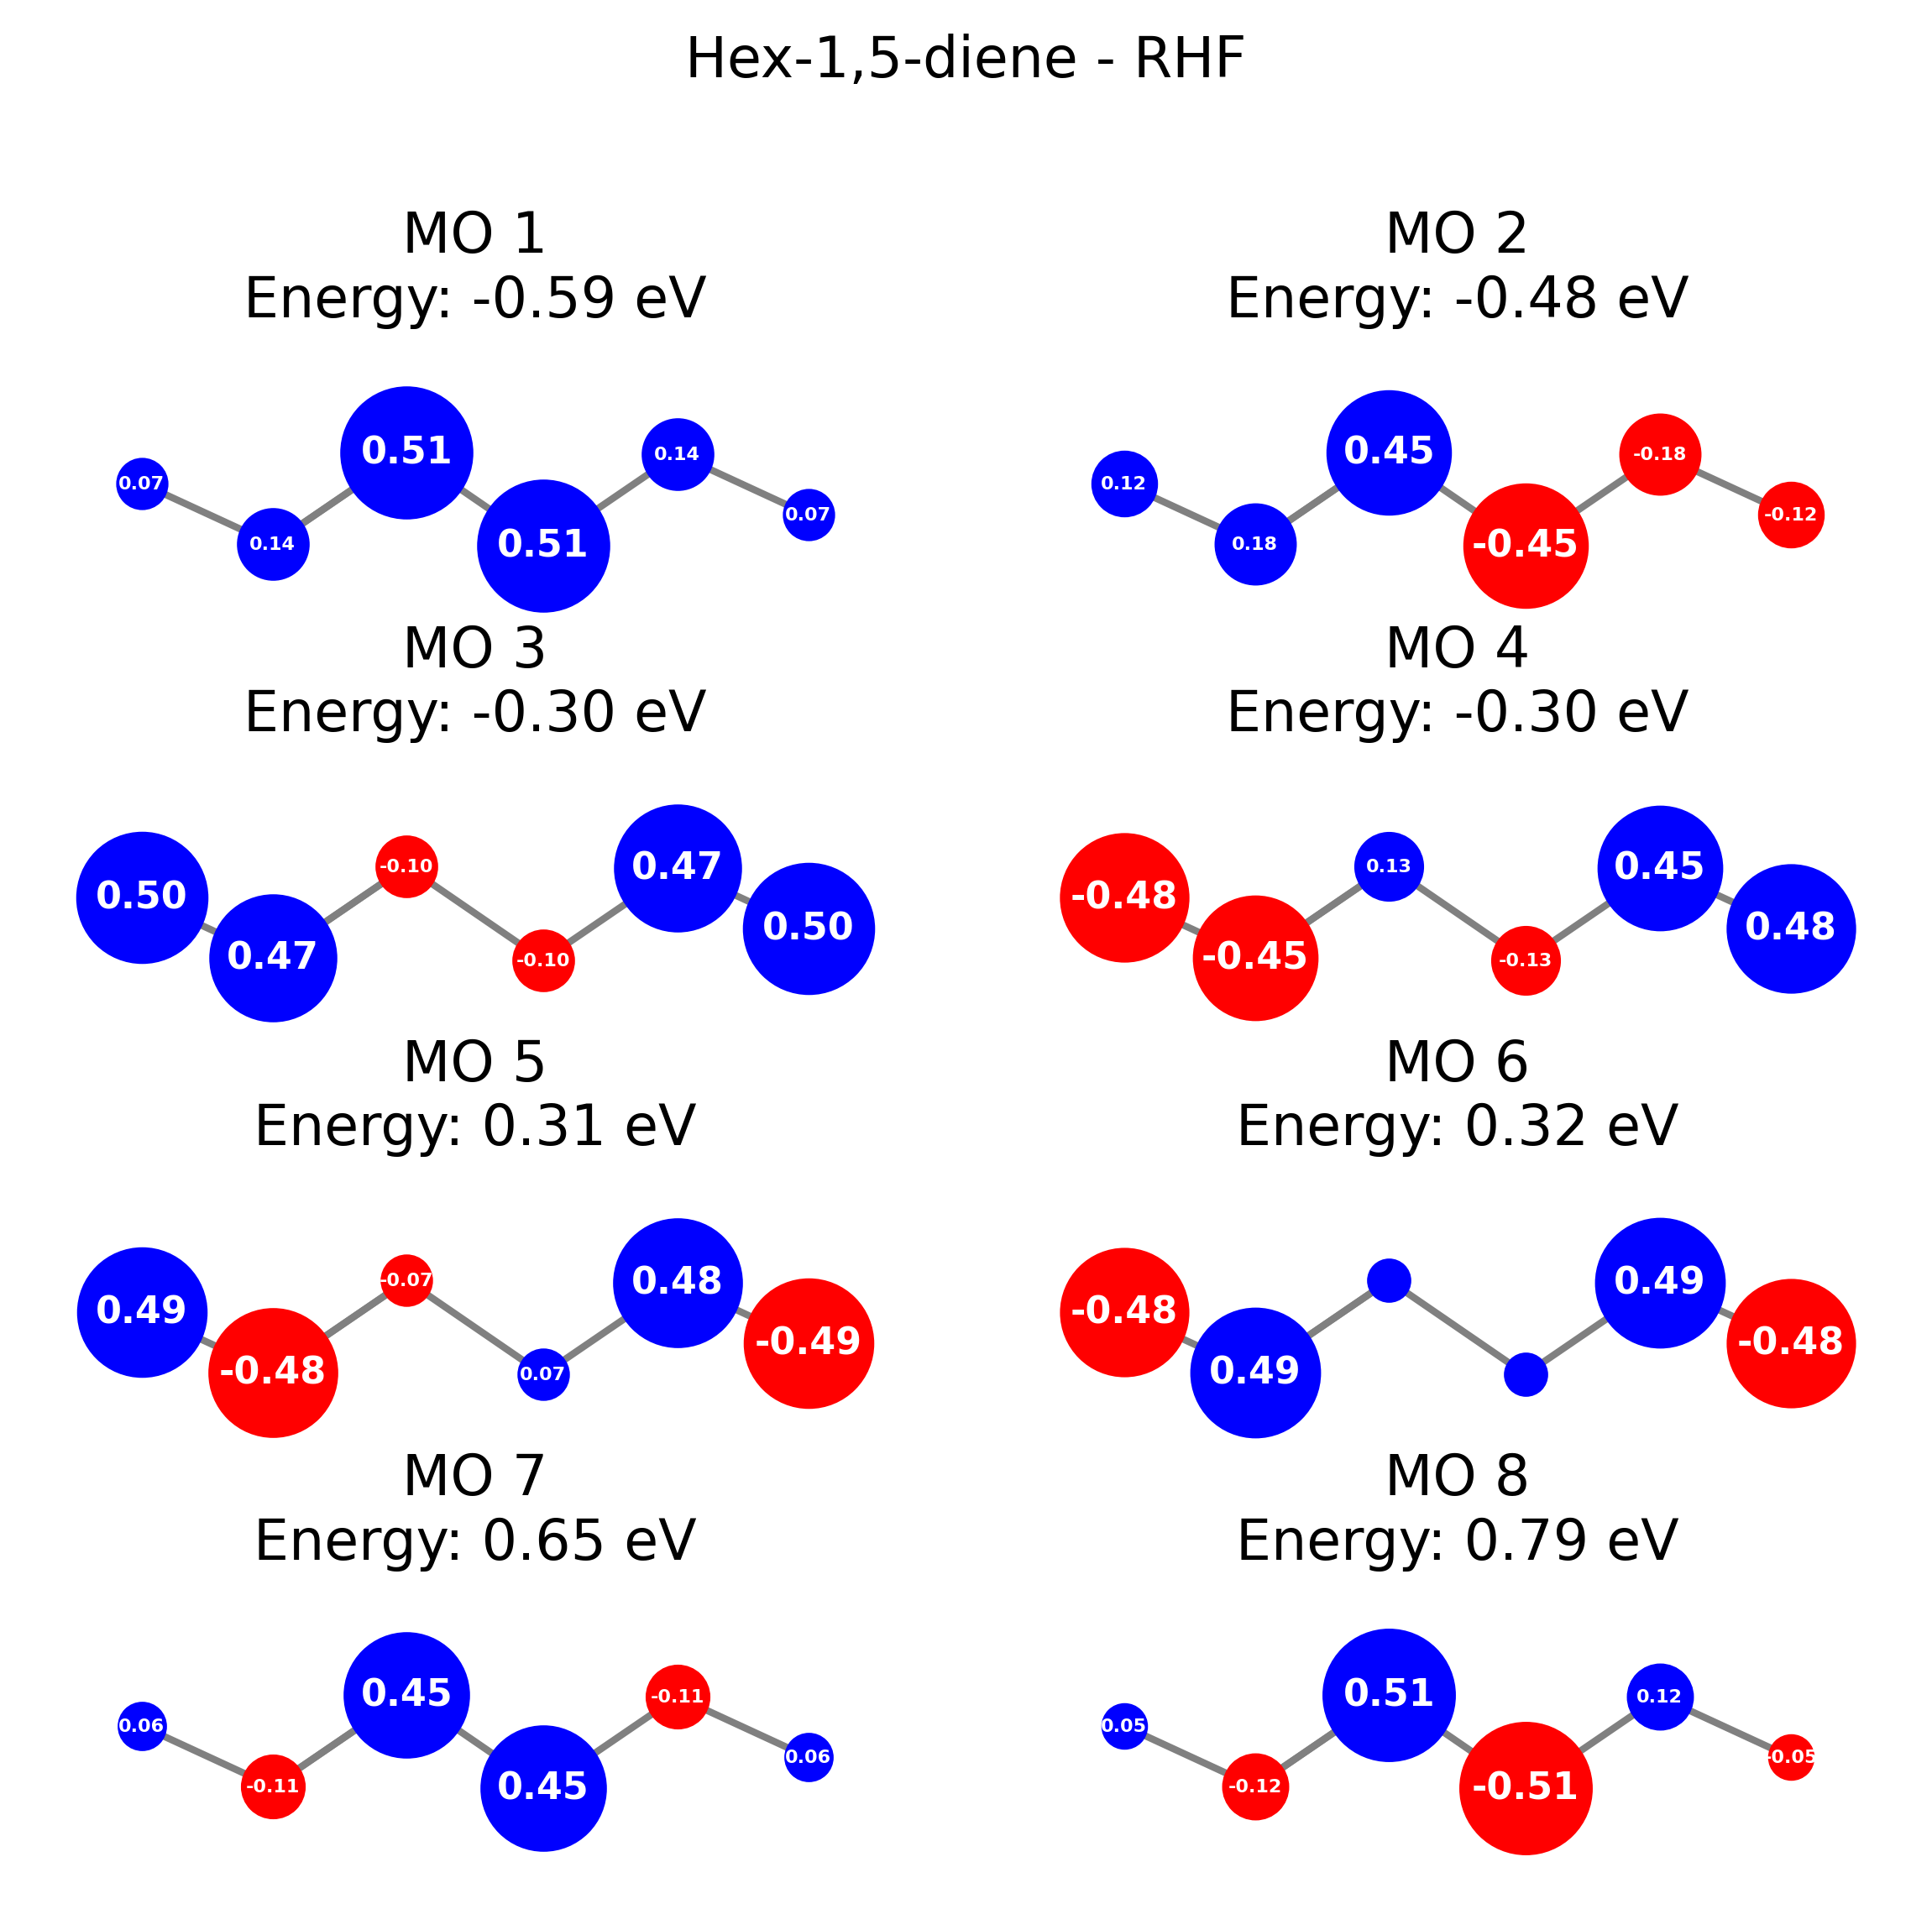

In [21]:
pts.plot_MOs(mo_eigenvalues, px_orbitals, coordinates, [(1,2)], 'Hex-1,5-diene', 'RHF', (6,6))


In [22]:
D_rhf = pts.making_D(px_orbitals, 8)

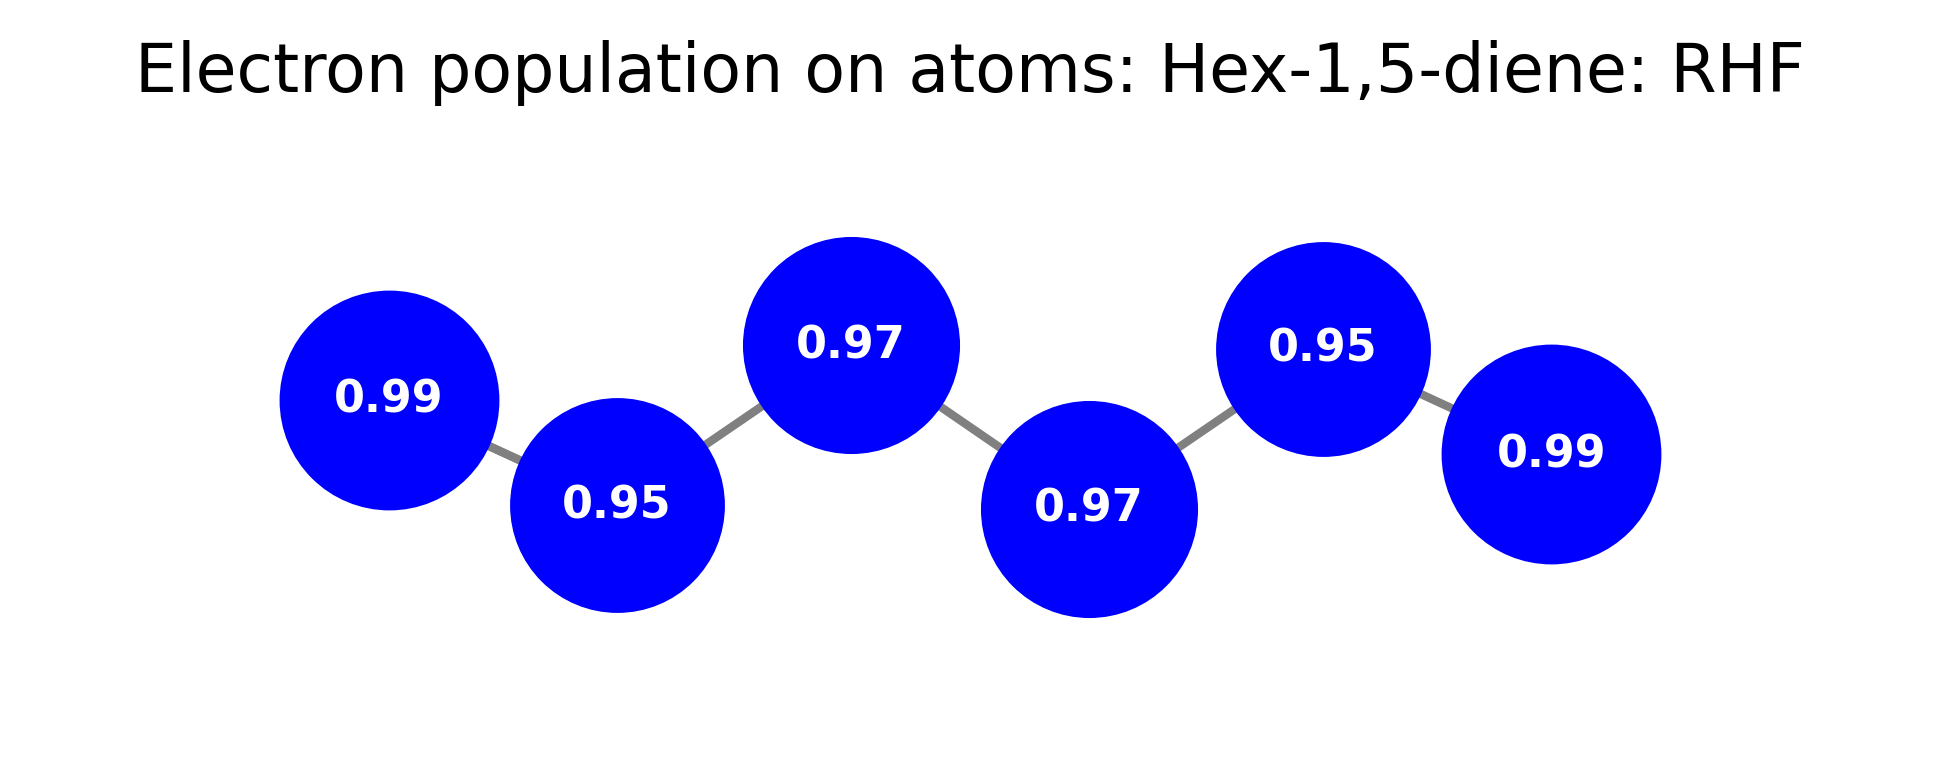

In [23]:
pts.plotting_of_D_atoms(6, coordinates, [(0,1)], D_rhf, 'Hex-1,5-diene', 'RHF', (6,2))

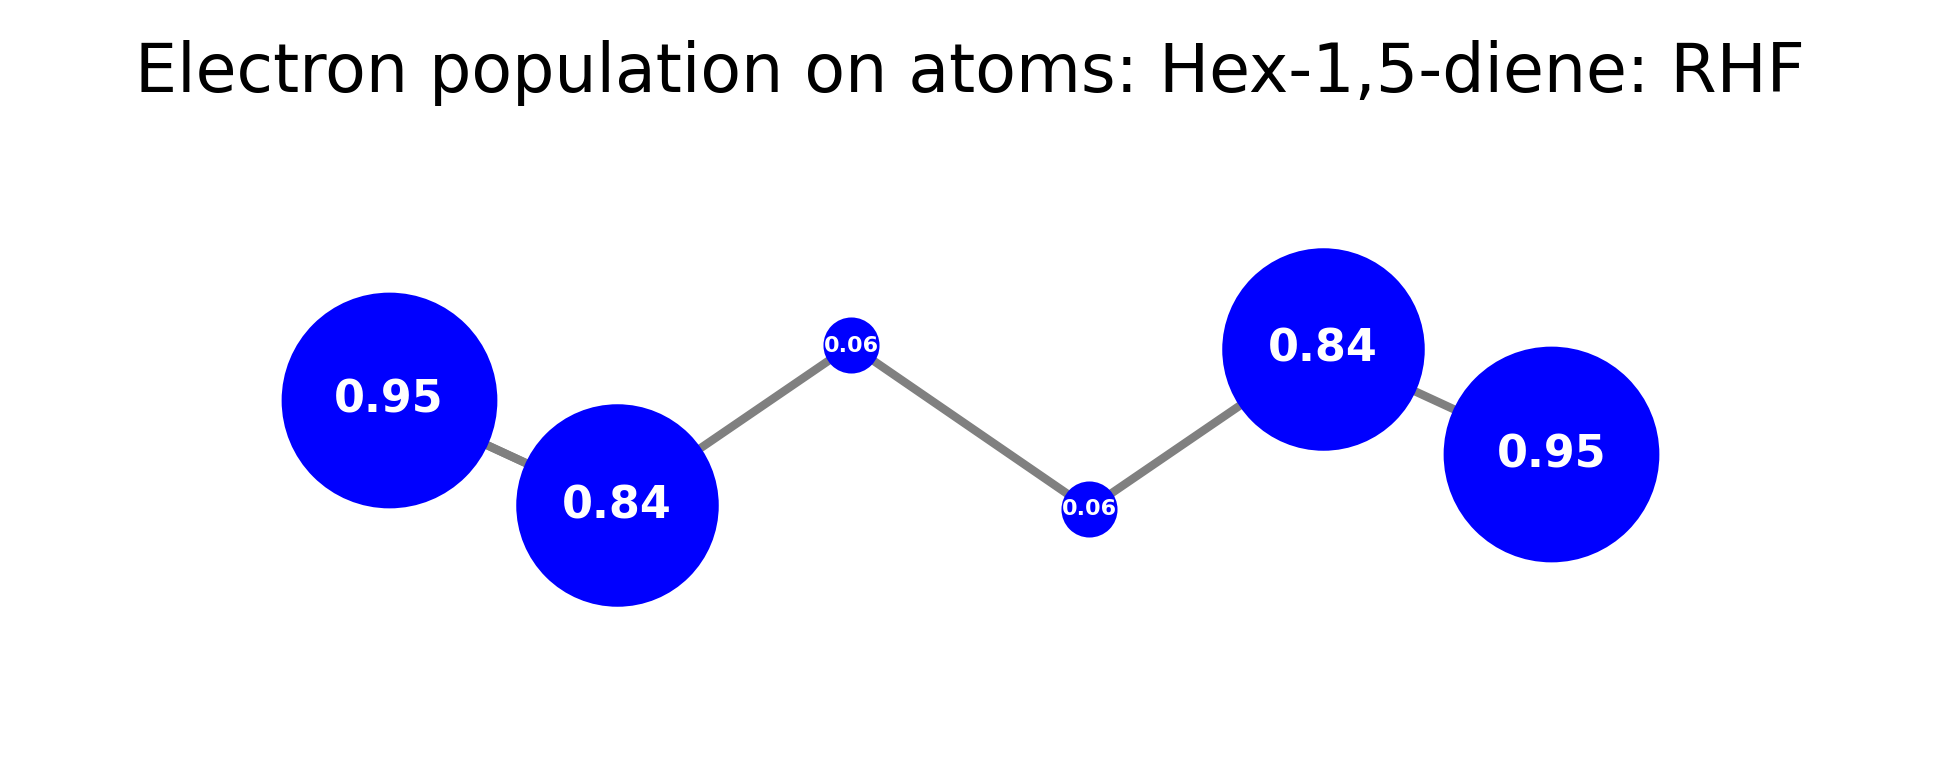

In [24]:
px_orbitals_pi = mo_coeff[px_indices][:, [21,22,23,24]]
D_rhf_pi = pts.making_D(px_orbitals_pi, 4)
pts.plotting_of_D_atoms(6, coordinates, [(0,1)], D_rhf_pi, 'Hex-1,5-diene', 'RHF', (6,2))



In [25]:
orbitals_pi = mo_coeff[:, [21,22,23,24]]
l_indexen_pi = []
for index, atom_orbital in enumerate(orbitals_pi):
    if atom_orbital[0] !=0:
        l_indexen_pi.append(index)
print(l_indexen_pi)
print(orbitals_pi)


[2, 7, 12, 17, 22, 27, 33, 34, 35, 36]
[[-0.          0.         -0.          0.        ]
 [-0.         -0.          0.         -0.        ]
 [ 0.49873743 -0.47789302  0.48568638 -0.476924  ]
 [ 0.         -0.         -0.         -0.        ]
 [ 0.         -0.         -0.          0.        ]
 [ 0.         -0.         -0.          0.        ]
 [-0.         -0.          0.         -0.        ]
 [ 0.46639118 -0.44878732 -0.48017985  0.48734985]
 [-0.          0.         -0.          0.        ]
 [-0.          0.         -0.          0.        ]
 [-0.         -0.         -0.          0.        ]
 [ 0.          0.          0.         -0.        ]
 [-0.1031066   0.1299162  -0.06986665  0.04795547]
 [ 0.         -0.          0.         -0.        ]
 [ 0.         -0.          0.          0.        ]
 [-0.         -0.          0.          0.        ]
 [ 0.          0.         -0.         -0.        ]
 [-0.1031066  -0.1299162   0.06986665  0.04795547]
 [-0.          0.          0.          0.  

In [26]:
a = [2, 7, 12, 17, 22, 27, 33, 34, 35, 36]
print(hex15diene_molecule.ao_labels())
b = [hex15diene_molecule.ao_labels()[index] for index in a]

print(b)

['0 C 1s    ', '0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 1s    ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 1s    ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 1s    ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 1s    ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 C 1s    ', '5 C 2s    ', '5 C 2px   ', '5 C 2py   ', '5 C 2pz   ', '6 H 1s    ', '7 H 1s    ', '8 H 1s    ', '9 H 1s    ', '10 H 1s    ', '11 H 1s    ', '12 H 1s    ', '13 H 1s    ', '14 H 1s    ', '15 H 1s    ']
['0 C 2px   ', '1 C 2px   ', '2 C 2px   ', '3 C 2px   ', '4 C 2px   ', '5 C 2px   ', '9 H 1s    ', '10 H 1s    ', '11 H 1s    ', '12 H 1s    ']


In [27]:
orbitals_pi = mo_coeff[[2, 7, 12, 17, 22, 27, 33, 34, 35, 36]][:, [21,22,23,24]]
D = pts.making_D(orbitals_pi, 4)
print(sum(np.diag(D)))

4.0


In [28]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
hexdiene = huckel(10, -2, -1)
hexdiene.create_matrix()
a = 0
b= -0.24
hexdiene.huckel_matrix = np.array([
    [a, b, 0, 0, 0, 0],
    [b, a, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, a, b],
    [0, 0, 0, 0, b, a],  
])
huc_mat = hexdiene.huckel_matrix

print(huc_mat)

[[ 0.   -0.24  0.    0.    0.    0.  ]
 [-0.24  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.24]
 [ 0.    0.    0.    0.   -0.24  0.  ]]


In [29]:
hexdiene.solve_huckel_matrix()
eigenvalues = hexdiene.eigenvalues
eigenvectors = hexdiene.eigenvectors
print(eigenvalues)
print(eigenvectors)

[-0.24 -0.24  0.    0.    0.24  0.24]
[[-0.70710678  0.          0.          0.         -0.70710678  0.        ]
 [-0.70710678  0.         -0.          0.          0.70710678  0.        ]
 [-0.         -0.         -1.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -1.         -0.         -0.        ]
 [-0.         -0.70710678 -0.         -0.         -0.         -0.70710678]
 [-0.         -0.70710678 -0.         -0.         -0.          0.70710678]]


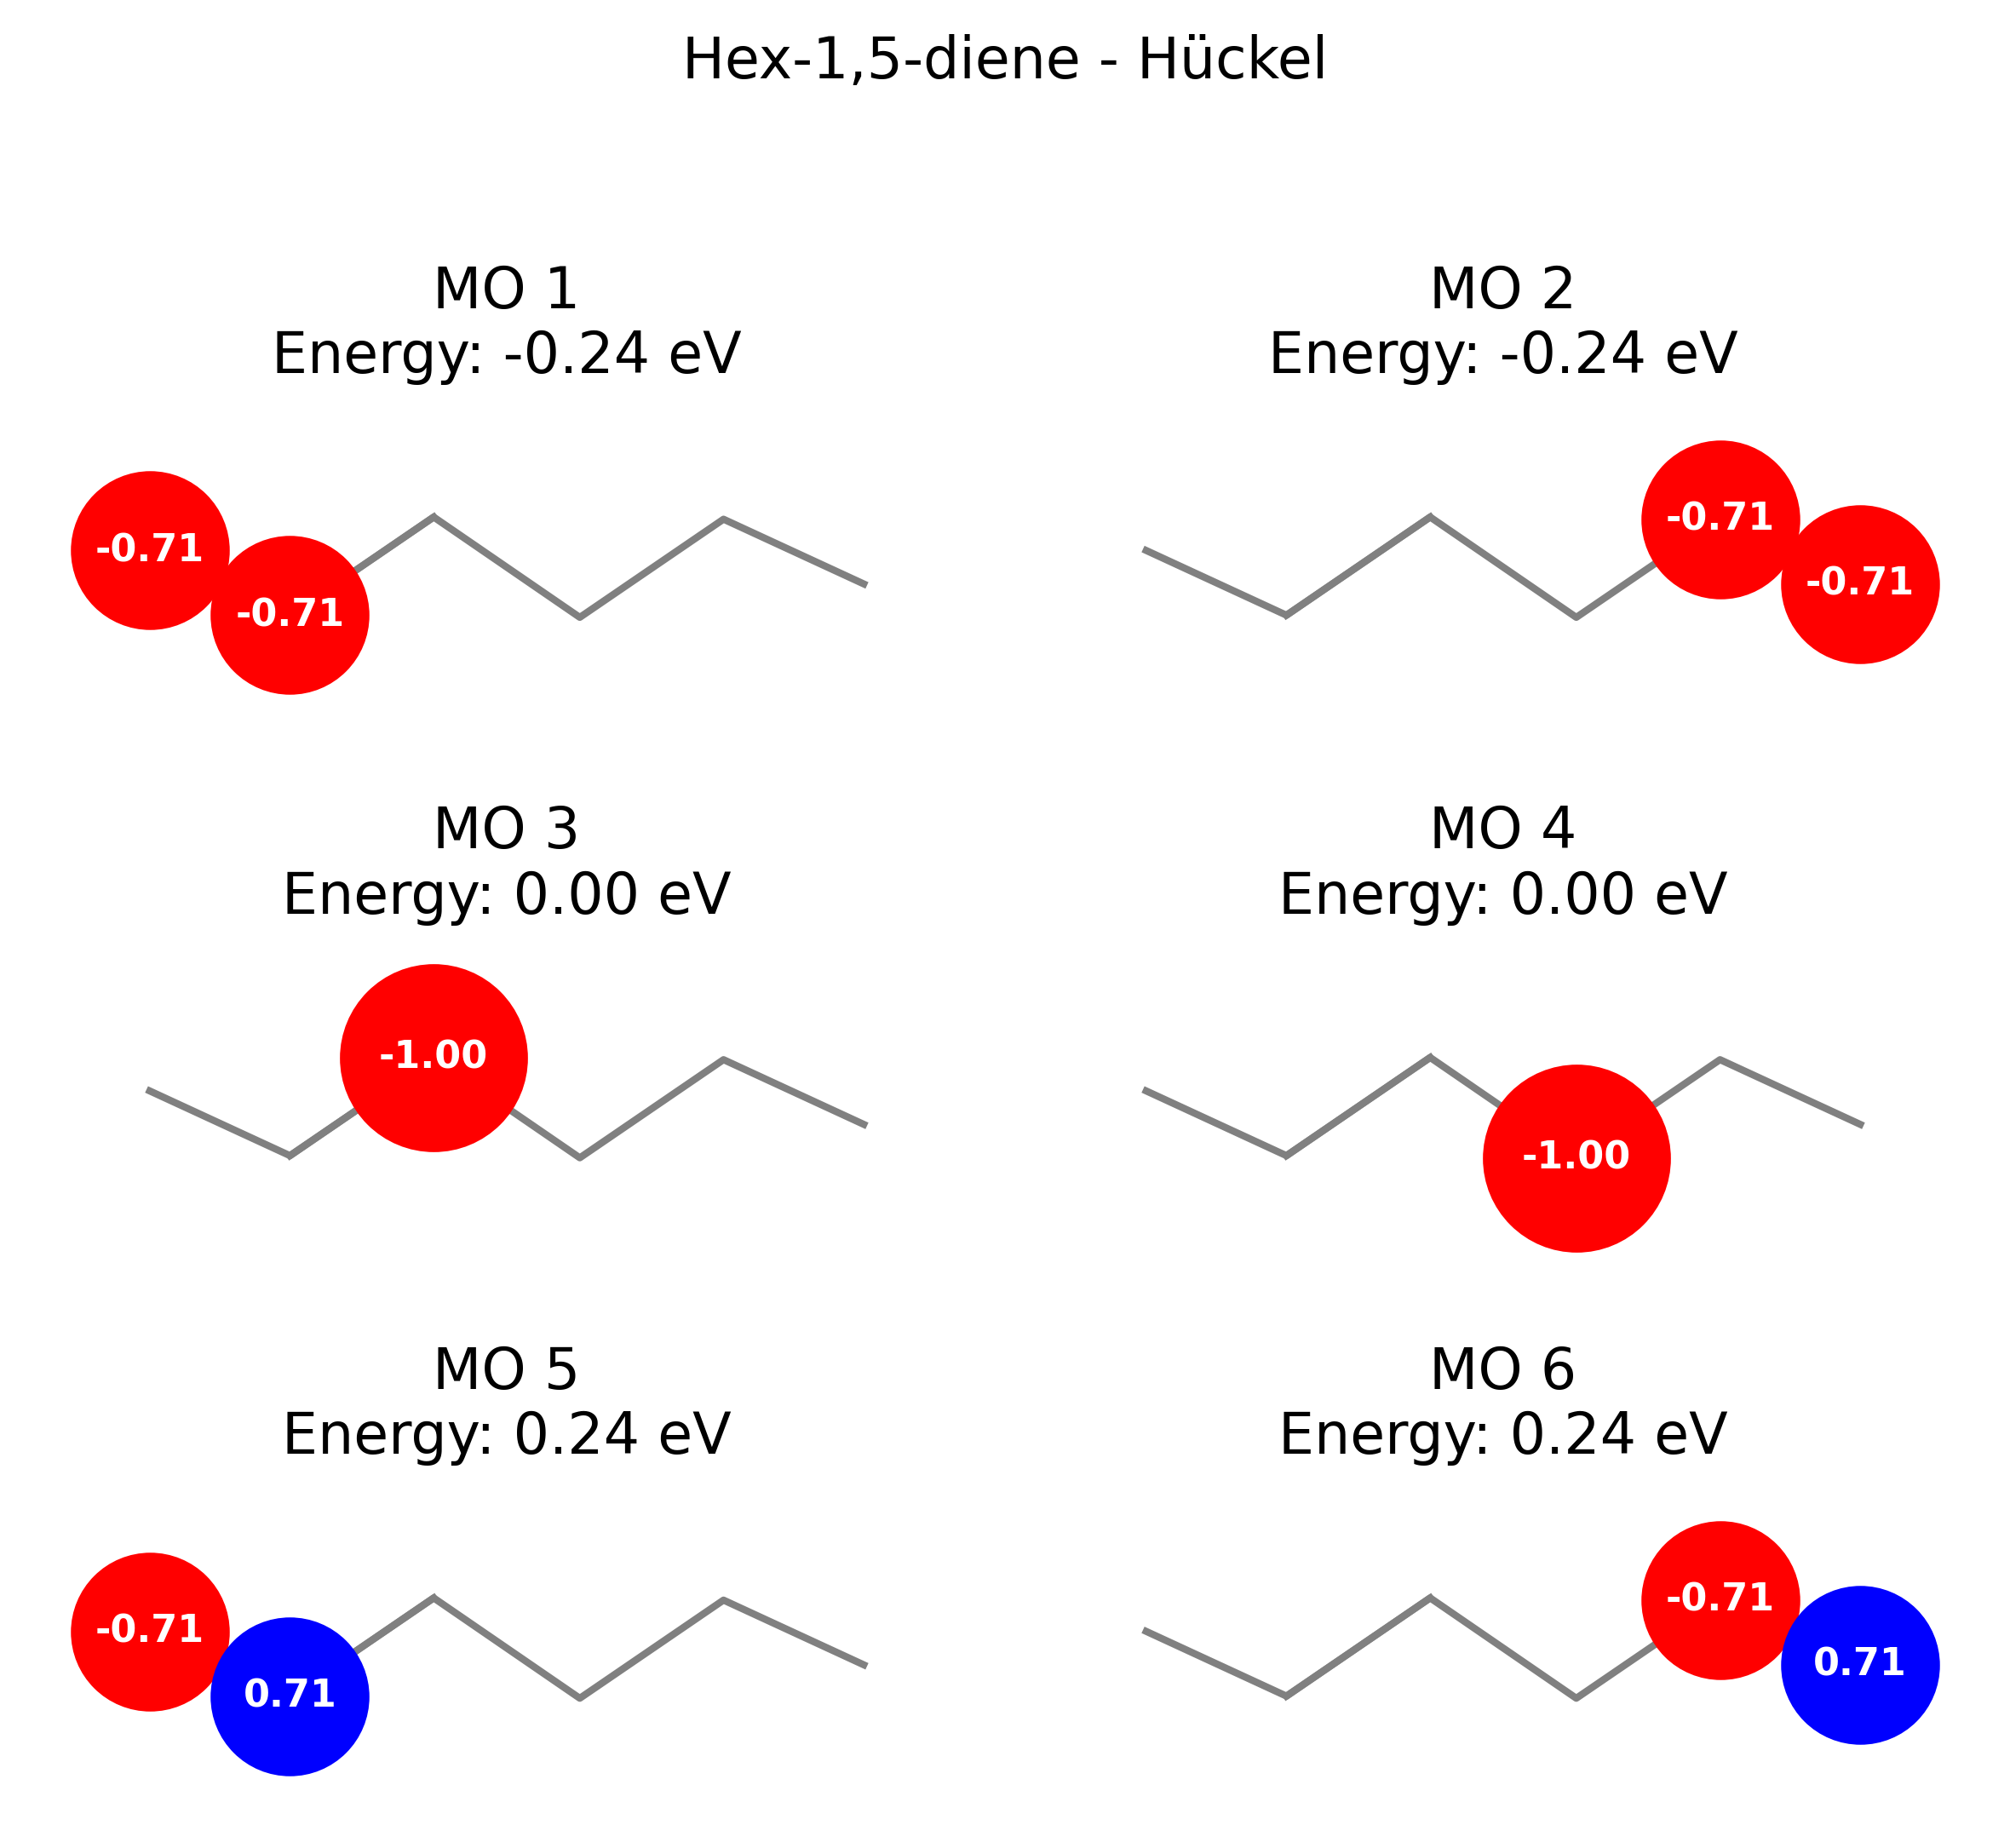

In [32]:
pts.plot_MOs(eigenvalues, eigenvectors, coordinates, [(1,2)], 'Hex-1,5-diene', 'Hückel', (6,6))

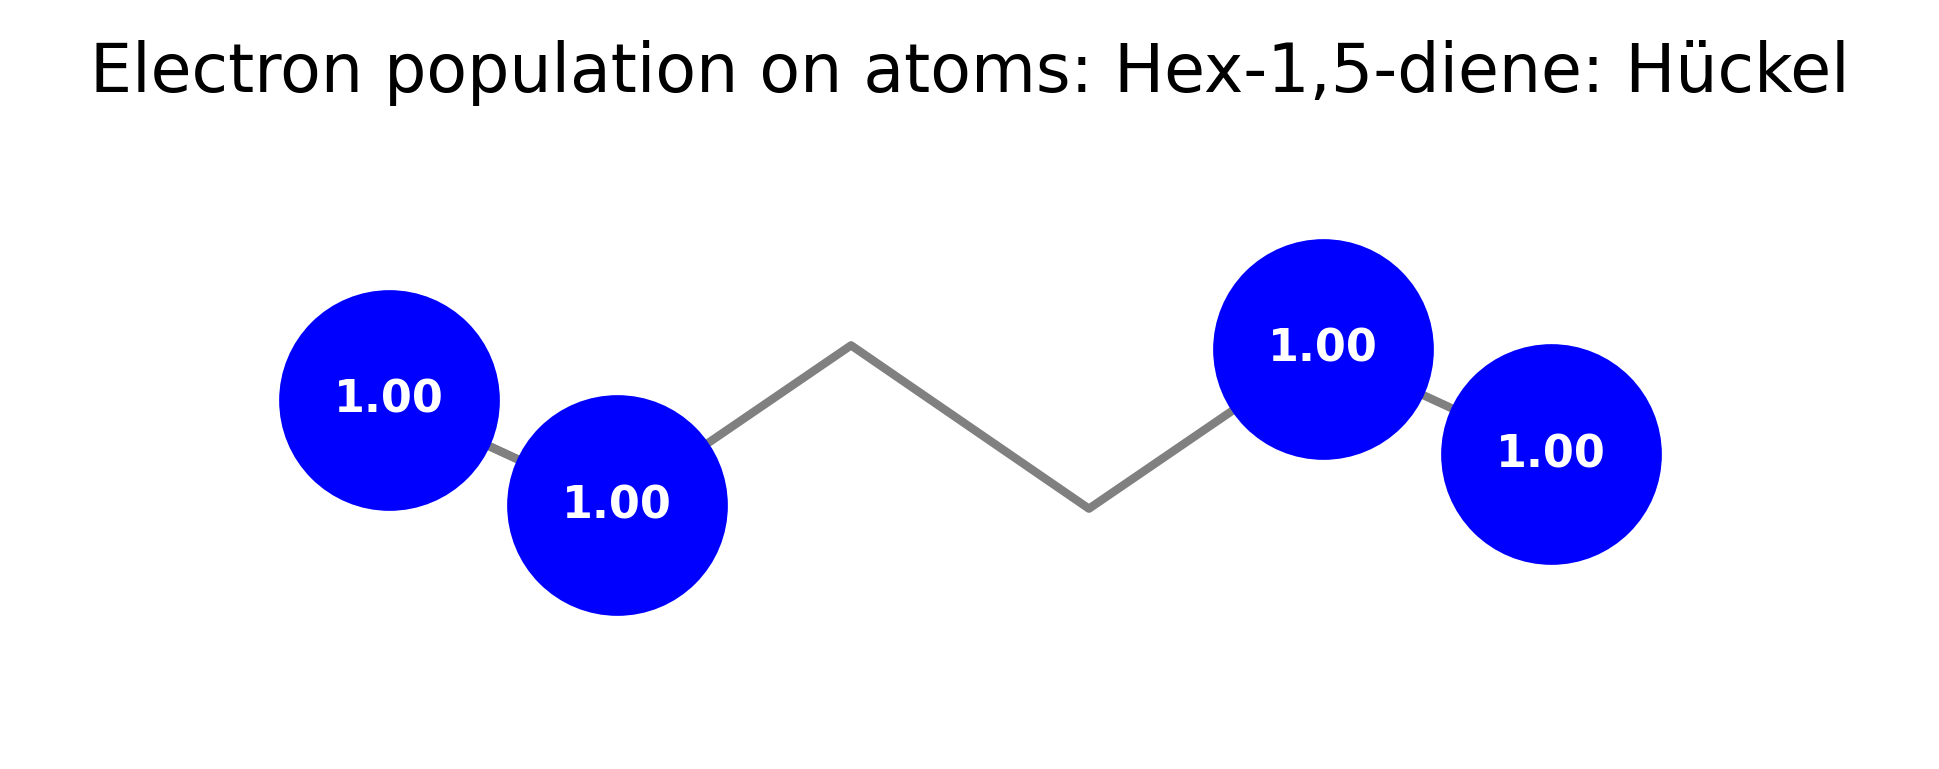

In [31]:
D_huc = pts.making_D(eigenvectors, 4)
pts.plotting_of_D_atoms(6, coordinates, [(0,1)], D_huc, 'Hex-1,5-diene', 'Hückel', (6,2))